In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv',index_col="Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("Species",axis=1).values,data["Species"].values,test_size=.2,random_state=54)

In [4]:
def categori_to_arr(y):
    category_dict = {'Iris-setosa': [1,0,0], 'Iris-versicolor': [0,1,0], 'Iris-virginica': [0,0,1]}        
    return np.array([category_dict[i] for i in y])
y_train = categori_to_arr(y_train)

In [5]:
def rev_categori(y_in):
    """
    category_dict = {tuple([1,0,0]) : 'Iris-setosa',tuple([0,1,0]):'Iris-versicolor',tuple([0,0,1]):'Iris-virginica'}
    y_out = np.array([category_dict[y] for y in tuple(y_in)])
    """
    """
    y_out = []
    for y in y_in:
        if(y == [0,0,1]).all():
            y = 'Iris-virginica'
        elif(y == [0,1,0]).all():
            y = 'Iris-versicolor'
        elif(y == [1,0,0]).all():
            y = 'Iris-setosa'
        y_out.append(y)
    return y_out
    """
    """
    [0.2,0.1,0.6],[0.2,0.1,0.7] -> Irıs ... 
    """
    
    a2_max = np.argmax(y_in, axis=1)
    
    y_pred = []
    for i in a2_max:
        if i == 0:
            y_pred.append('Iris-setosa')
        elif i == 1:
            y_pred.append('Iris-versicolor')
        else:
            y_pred.append('Iris-virginica')
    
    return y_pred

In [6]:
def init_params():
    num_features = 4
    num_hidden_units = 12
    num_output_units = 3

    # rastgele değerlerle başlangıçta ağırlıkların ve biasların tanımlanması
    W1 = np.random.randn(num_features, num_hidden_units)
    b1 = np.zeros((num_hidden_units))
    W2 = np.random.randn(num_hidden_units, num_output_units)
    b2 = np.zeros((num_output_units))

    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = init_params()

In [8]:
def sigmoid(z):
    ret = 1 / (1 + np.exp(-z))
    return ret

In [9]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [10]:
def softmax_old(z):
    ret = np.exp(z) / np.sum(np.exp(z))
    return ret

In [11]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) #softmax trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [12]:
def softmax_derivative(x):
    s = softmax(x).reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [13]:
def ReLU(z):
    return np.maximum(0,z)

In [14]:
def argmax(z):
    y = np.zeros_like(z)
    y[np.arange(len(z)), z.argmax(1)] = 1
    return y

In [15]:
def predict(X, W1, b1, W2, b2):
    """
    Verilen özelliklerin tahmini sınıf etiketlerini döndürür.
    """
    _, z2, _, _ = forward_prop(X, W1, b1, W2, b2)
    a2 = argmax(z2)
    return a2

In [16]:
def calculate_cost(y, a2):
    m = y.shape[0]
    loss = np.multiply(y, np.log(a2)) + np.multiply(1 - y, np.log(1 - a2))
    cost = -1/m * np.sum(loss)
    return cost

In [17]:
def forward_prop(X,W1,b1,W2,b2):
    # Hidden Layer
    z1 = np.dot(X, W1) + b1
    a1 = ReLU(z1)

    # Output Layer
    z2 = np.dot(a1,W2) + b2
    a2 = softmax(z2)
    
    return a2,z2,a1,z1

In [177]:
def backward_prop(X, Y, a2, z2, a1, z1, W1, W2):
    delta3 = a2 - Y
    
    delta2 = np.dot(delta3, W2.T) * (z1 > 0)
    
    dW2 = np.dot(a1.T, delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)

    return dW1, db1, dW2, db2

In [178]:
def gradient_descent(X, y, W1, b1, W2, b2, num_iterations=1000, learning_rate=.01,beta=0.9):
    costs = []
    for i in range(num_iterations):
        # Forward Propagation
        a2, z2, a1, z1 = forward_prop(X, W1, b1, W2, b2)

        # Backward Propagation
        dW1, db1, dW2, db2 = backward_prop(X, y, a2, z2, a1, z1, W1, W2)

        # Parameter Updates
        #W1 = W1 - learning_rate * dW1
        W1 -= learning_rate * (dW1 + beta * W1)
        b1 = b1 - learning_rate * db1
        #W2 = W2 - learning_rate * dW2
        W2 -= learning_rate * (dW2 + beta * W2)
        b2 = b2 - learning_rate * db2

        costs.append(calculate_cost(y, a2))
        
    return W1, b1, W2, b2, costs

In [179]:
W1, b1, W2, b2, costs = gradient_descent(x_train, y_train, W1, b1, W2, b2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
preds = predict(x_train, W1, b1, W2, b2)
#label_preds = rev_categori(preds)

Text(0, 0.5, 'Cost')

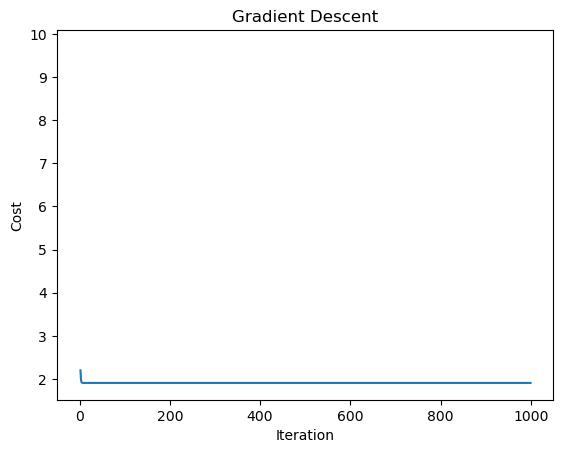

In [181]:
plt.plot(costs)
plt.title("Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [182]:
test1, test2 = rev_categori(preds),rev_categori(y_train)

d=0
for i in range(len(test2)):
    if(test1[i] == test2[i]):
        d += 1
        
print(f"{d}/{len(test2)}")

42/120


In [183]:
a2, _, _, _ = forward_prop(x_train, W1, b1, W2, b2)
b2,a2

(array([[ 0.04940531, -0.02470266, -0.02470266]]),
 array([[0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.325, 0.325],
        [0.35 , 0.3